# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [4]:
# Load the dataset
df = pd.read_csv('Employee_data.csv')

In [5]:
# Check the first few entries
df.head(5)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [6]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [7]:
# Inspect the different columns in the dataset
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [8]:
# Check the summary of the dataset
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [9]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [10]:
# Check the number of missing values in each column
df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [11]:
# Check the percentage of missing values in each column
round((df.isnull().sum() / len(df)) * 100, 2)

Employee ID                   0.00
Age                           0.00
Gender                        0.00
Years at Company              0.00
Job Role                      0.00
Monthly Income                0.00
Work-Life Balance             0.00
Job Satisfaction              0.00
Performance Rating            0.00
Number of Promotions          0.00
Overtime                      0.00
Distance from Home            2.56
Education Level               0.00
Marital Status                0.00
Number of Dependents          0.00
Job Level                     0.00
Company Size                  0.00
Company Tenure (In Months)    3.23
Remote Work                   0.00
Leadership Opportunities      0.00
Innovation Opportunities      0.00
Company Reputation            0.00
Employee Recognition          0.00
Attrition                     0.00
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [12]:
# Handle the missing value rows in the column

# display(df['Distance from Home'].dtype)
# display(df['Company Tenure (In Months)'].dtype)
# df[['Distance from Home', 'Company Tenure (In Months)']].describe()

df['Distance from Home'].fillna(df['Distance from Home'].median(), inplace = True)
df['Company Tenure (In Months)'].fillna(df['Company Tenure (In Months)'].median(), inplace = True)

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [13]:
# Check the percentage of remaining data after missing values are removed
round((df.isnull().sum() / len(df)) * 100, 2)

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [14]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def cat_summary(df):
    for col in df.select_dtypes(include=['object', 'category']).columns  :
        unique_values = df[col].value_counts()  
        # print(f"\nColumn: '{col}'")  
        print('-'*60)
        print(f"Unique Values: {unique_values}") 

In [15]:
# Check the data
cat_summary(df)

------------------------------------------------------------
Unique Values: Gender
Male      40898
Female    33712
Name: count, dtype: int64
------------------------------------------------------------
Unique Values: Job Role
Technology    19350
Healthcare    17107
Education     15679
Media         12011
Finance       10463
Name: count, dtype: int64
------------------------------------------------------------
Unique Values: Work-Life Balance
Good         28196
Fair         22569
Excellent    13451
Poor         10394
Name: count, dtype: int64
------------------------------------------------------------
Unique Values: Job Satisfaction
High         37306
Very High    15101
Medium       14738
Low           7465
Name: count, dtype: int64
------------------------------------------------------------
Unique Values: Performance Rating
Average          44786
High             14938
Below Average    11150
Low               3736
Name: count, dtype: int64
--------------------------------------------

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [16]:
# Drop redundant columns which are not required for modelling
droping_col = [
    'Leadership Opportunities', # Drop due to most employees lacking leadership roles.
    'Innovation Opportunities', # Drop as few employees have innovation opportunities.
    'Company Reputation', # Drop since it's an external factor with less impact on retention.
    'Employee Recognition', # Drop due to low or medium recognition for most employees.
    'Remote Work' # Drop as most employees are not working remotely.
]
df.drop(droping_col, axis = 1, inplace = True)

In [17]:
# Check first few rows of data
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22.0,Associate Degree,Married,0,Mid,Medium,89.0,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21.0,Masterâ€™s Degree,Divorced,3,Mid,Medium,21.0,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11.0,Bachelorâ€™s Degree,Married,3,Mid,Medium,74.0,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27.0,High School,Single,2,Mid,Small,50.0,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71.0,High School,Divorced,0,Senior,Medium,68.0,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [18]:
# Import Train Test Split
from sklearn.model_selection import train_test_split  

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [19]:
# Put all the feature variables in X
X = df.iloc[:, :-1]
# Put the target variable in y
y = df.iloc[:, -1]

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [20]:
X.shape

(74610, 18)

In [21]:
# Split the data into 70% train data and 30% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)  

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [22]:
# Select numerical columns
X_train_num = X_train.select_dtypes(include = ['number'])  

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

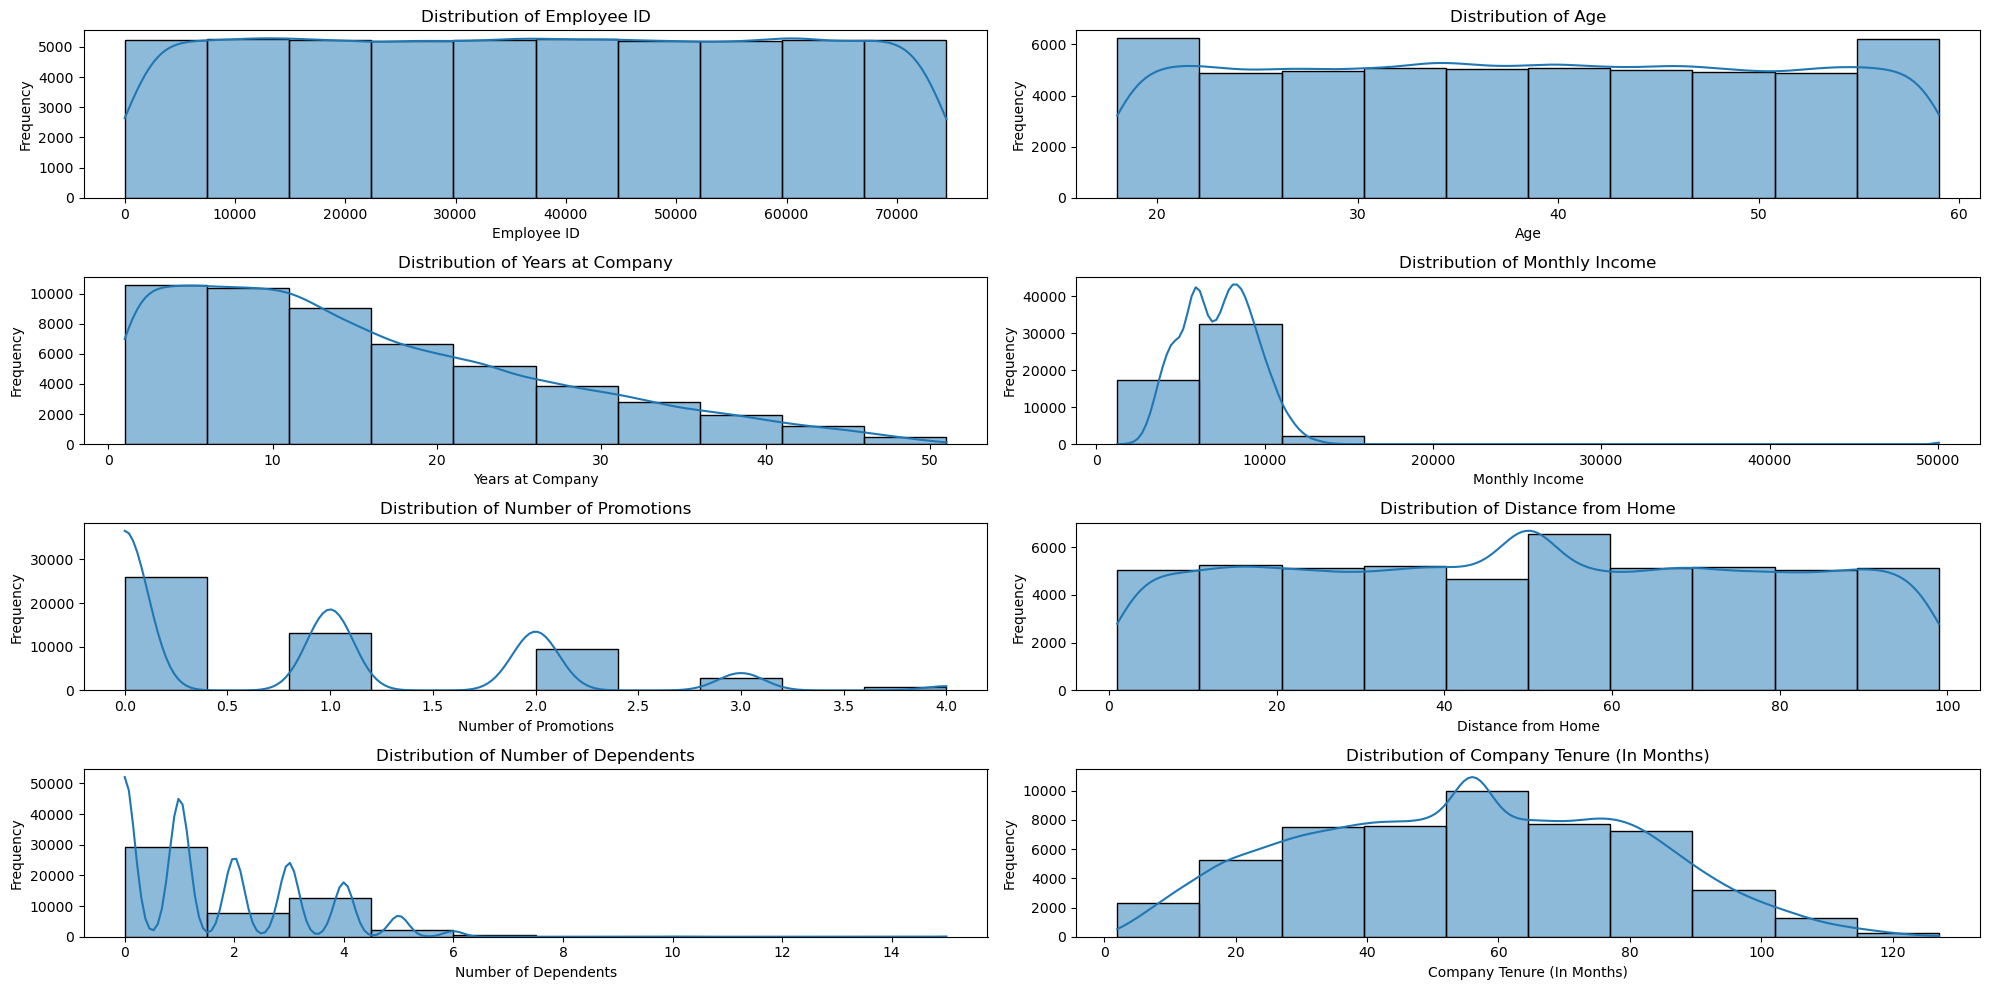

In [23]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

num_columns = len(X_train_num.columns)

plt.figure(figsize=(20, 10))

for i, column in enumerate(X_train_num.columns):
    num_rows = (num_columns + 1) // 2
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(X_train_num[column], bins=10, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

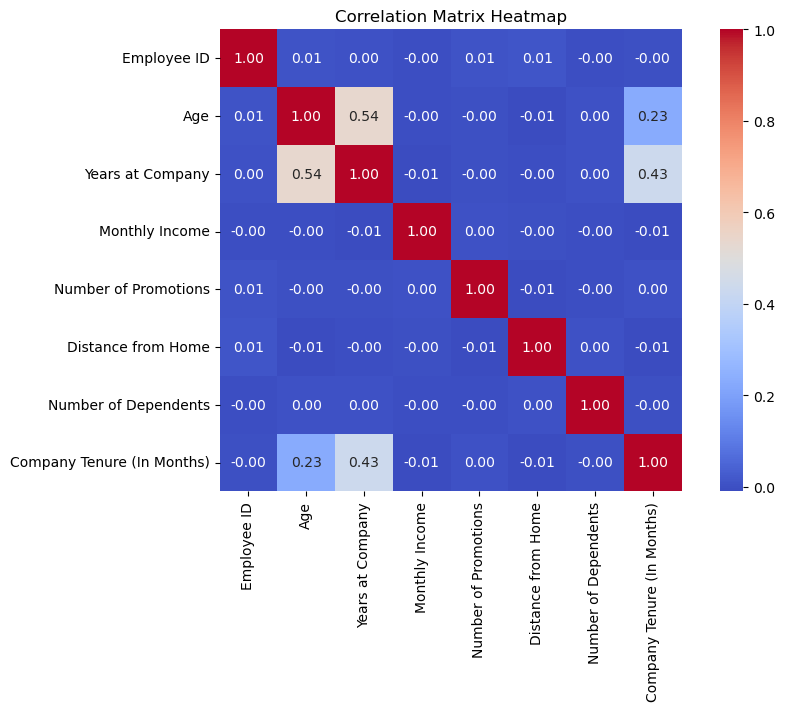

In [24]:
# Create correlation matrix for numerical columns
corr_matrix = X_train_num.corr()  

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))  
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm', square = True)  
plt.title('Correlation Matrix Heatmap')  
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

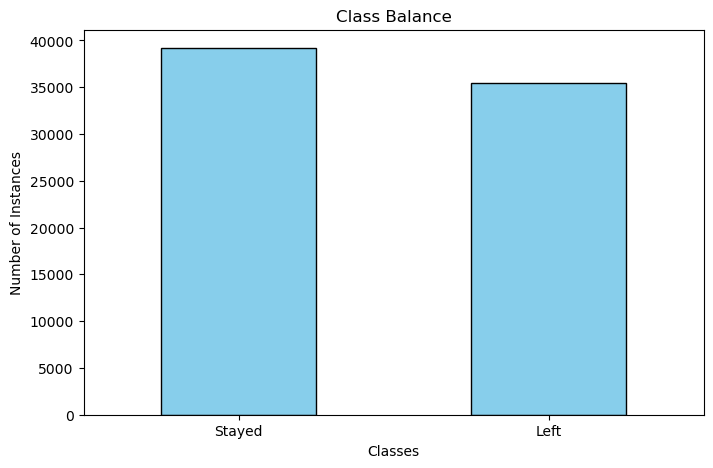

In [25]:
# Plot a bar chart to check class balance
class_counts = df['Attrition'].value_counts()  
plt.figure(figsize=(8, 5))  
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')  

plt.title('Class Balance')  
plt.xlabel('Classes')  
plt.ylabel('Number of Instances')  
plt.xticks(rotation = 0) 

plt.show()  

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

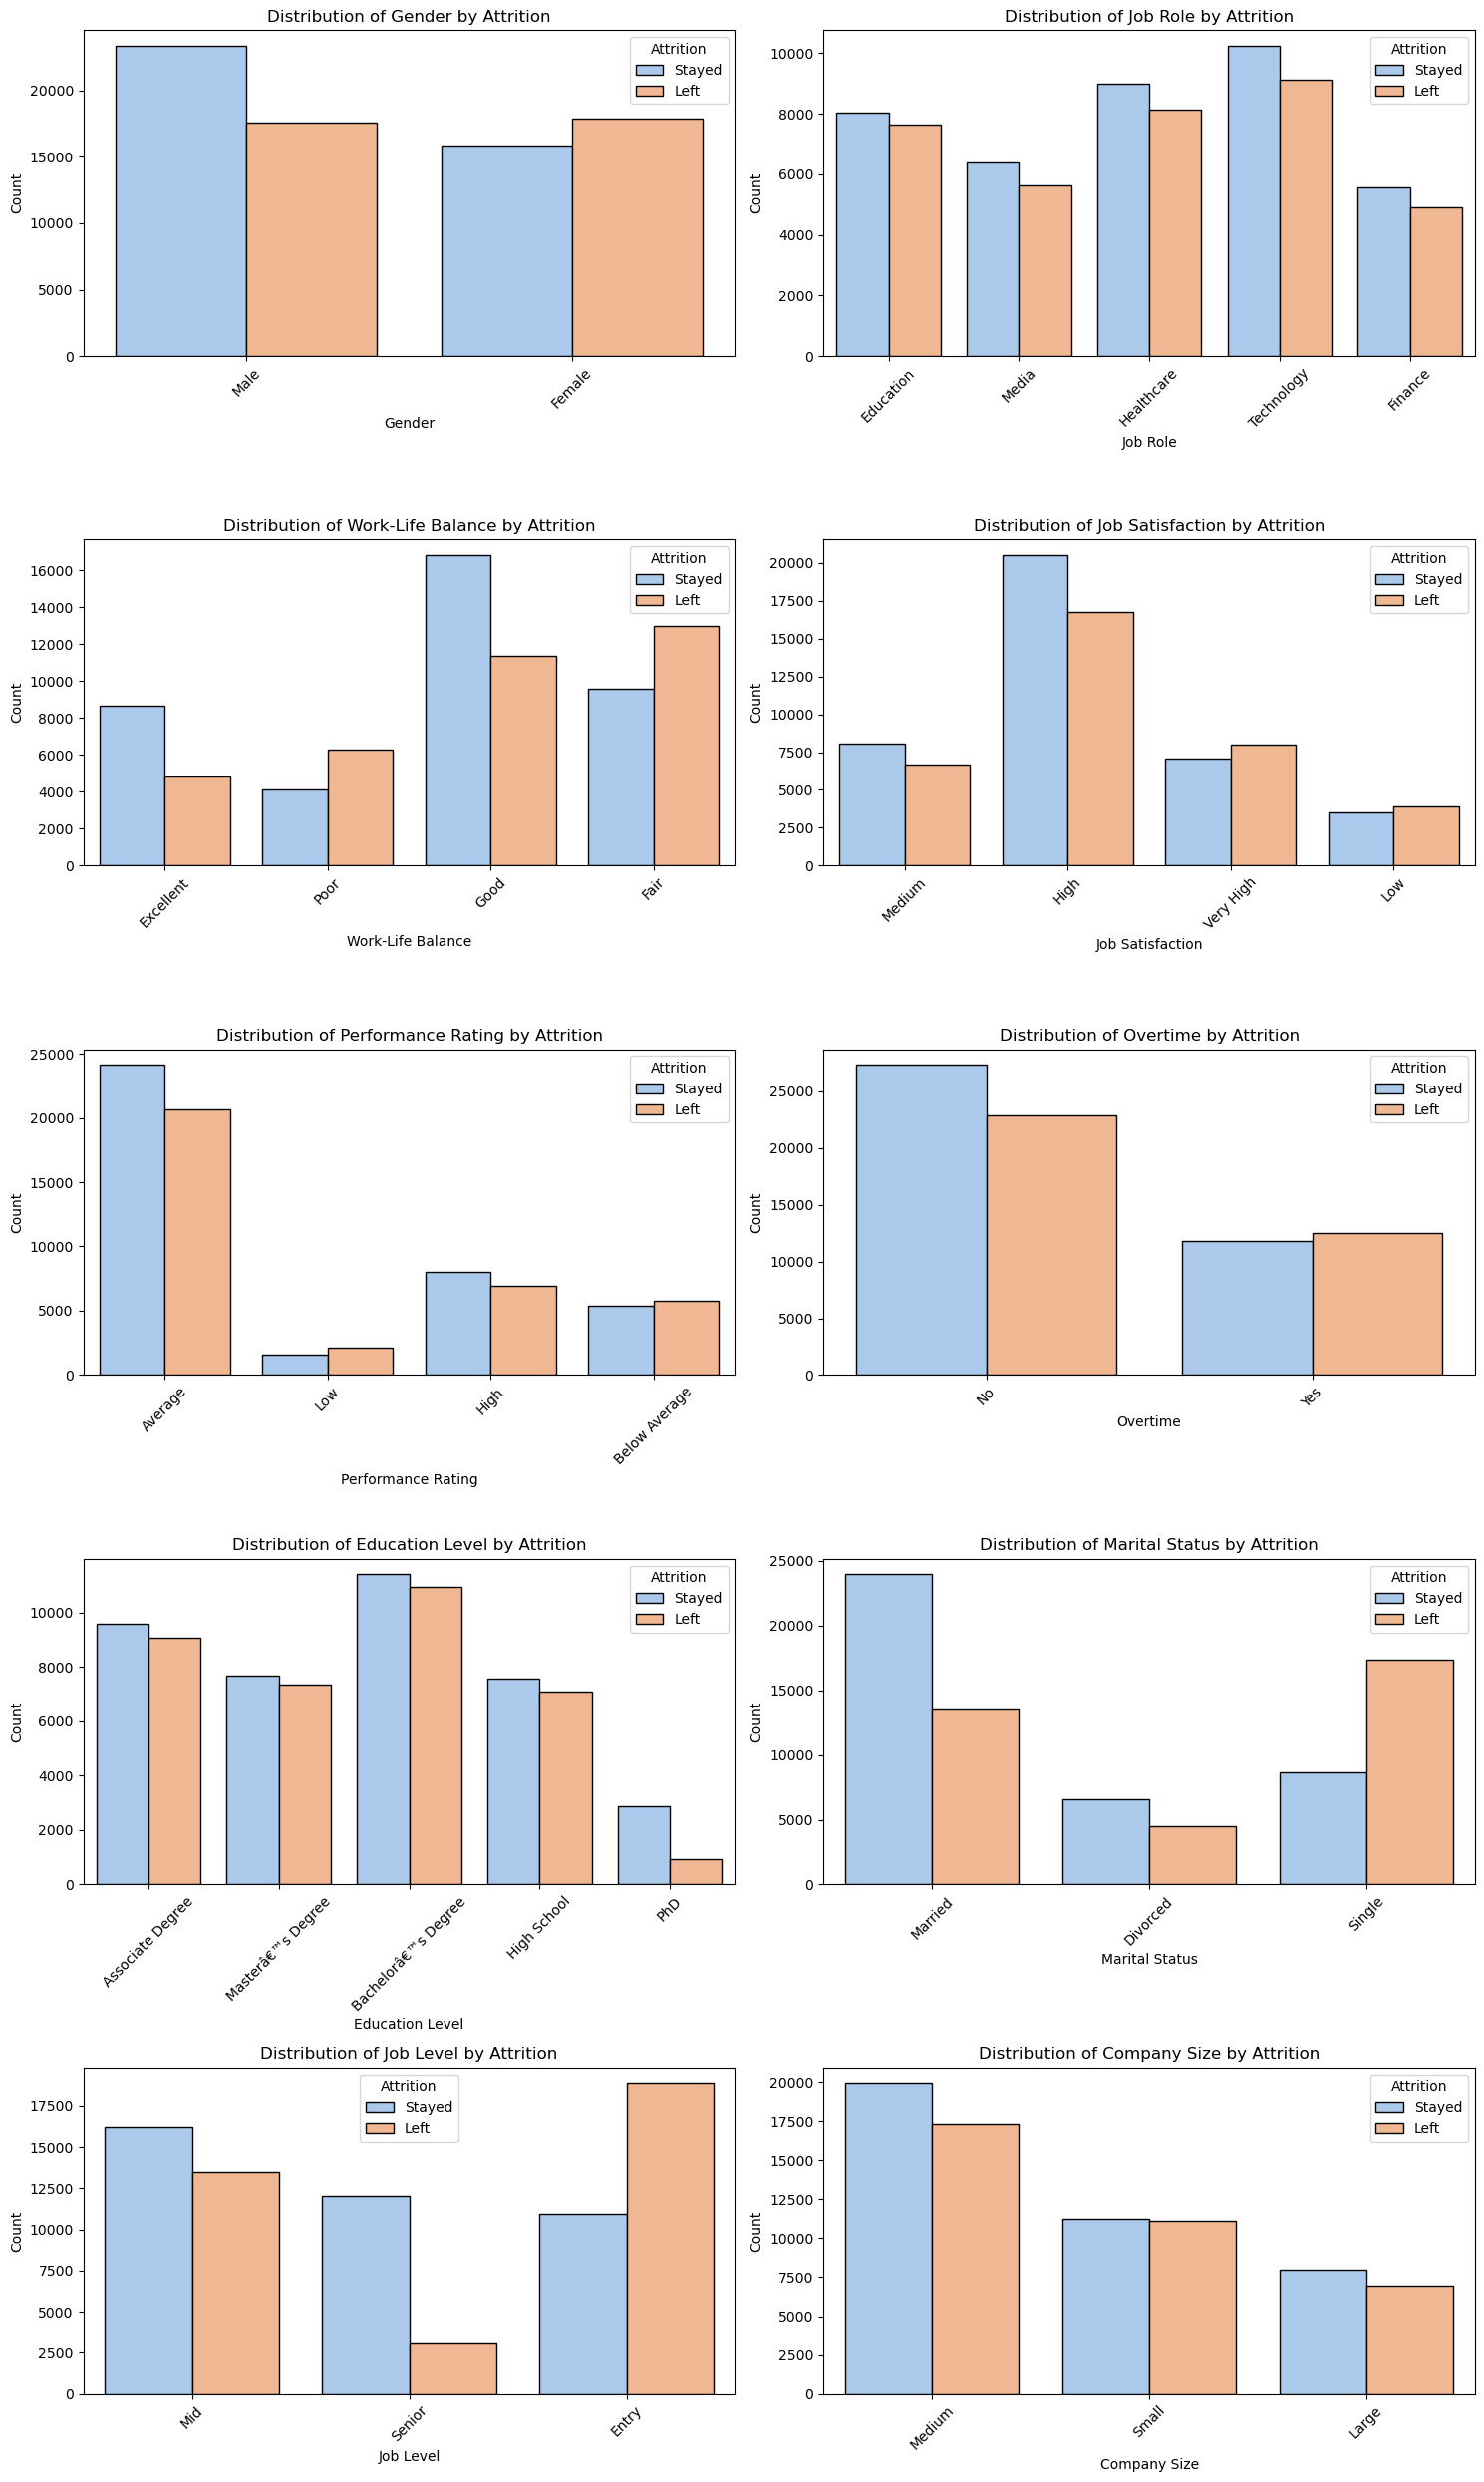

In [26]:
# Plot distribution for each categorical column with target variable
target_variable = 'Attrition'  

cat_col = df.select_dtypes(include=['object']).columns.tolist()  
cat_col.remove(target_variable)  

num_columns = len(cat_col)  
rows = (num_columns + 1) // 2  

palette = sns.color_palette("pastel")  

plt.figure(figsize=(15, 5 * rows))  

for i, column in enumerate(cat_col, start = 1):  
    plt.subplot(rows, 2, i)  
    sns.countplot(data=df, x = column, hue = target_variable, palette = palette, edgecolor = 'black')  
    plt.title(f'Distribution of {column} by {target_variable}')  
    plt.xlabel(column)  
    plt.ylabel('Count')  
    plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()  

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [ ]:
# Select numerical columns


5.1.2 Plot distribution of numerical columns

In [ ]:
# Plot all the numerical columns to understand their distribution


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [ ]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [ ]:
# Plot a bar chart to check class balance


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [ ]:
# Plot distribution for each categorical column with target variable


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [33]:
# Check the categorical columns
X_train[cat_col]

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size
67016,Female,Healthcare,Fair,Very High,Average,No,Associate Degree,Married,Mid,Medium
9437,Female,Healthcare,Good,Medium,Average,No,Associate Degree,Married,Mid,Medium
52439,Male,Media,Fair,High,High,No,Associate Degree,Single,Senior,Medium
32387,Male,Finance,Fair,High,Average,No,Bachelorâ€™s Degree,Single,Entry,Medium
62365,Female,Healthcare,Good,High,Average,No,Bachelorâ€™s Degree,Married,Mid,Medium
...,...,...,...,...,...,...,...,...,...,...
37194,Male,Healthcare,Fair,Medium,Average,No,Associate Degree,Single,Mid,Medium
6265,Female,Technology,Good,High,Average,No,High School,Single,Entry,Small
54886,Male,Media,Excellent,High,Low,No,High School,Married,Mid,Medium
860,Male,Finance,Good,Medium,Average,No,Associate Degree,Single,Mid,Medium


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [34]:
# Create dummy variables using the 'get_dummies' for independent columns
dummy_vars = pd.get_dummies(X_train[cat_col], drop_first = True, dtype = int)  

# Add the results to the master DataFrame
X_train_dummy = pd.concat([X_train, dummy_vars], axis = 1)  

Now, drop the original categorical columns and check the DataFrame

In [35]:
# Drop the original categorical columns and check the DataFrame
X_train_dummy.drop(cat_col, axis = 1, inplace = True)  

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [36]:
# Create dummy variables using the 'get_dummies' for independent columns
dummy_vars = pd.get_dummies(X_val[cat_col], drop_first = True, dtype = int)  
# Add the results to the master DataFrame
X_val_dummy = pd.concat([X_val, dummy_vars], axis = 1)  

Now, drop the original categorical columns and check the DataFrame

In [37]:
# Drop categorical columns and check the DataFrame
X_val_dummy.drop(cat_col, axis = 1, inplace = True)  

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [40]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train_df = pd.DataFrame(y_train, columns=['Attrition'])  
y_val_df = pd.DataFrame(y_val, columns=['Attrition'])  

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [44]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_dummy = pd.get_dummies(y_train_df['Attrition'], dtype = int)

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [46]:
# Create dummy variables using the 'get_dummies' for dependent column
y_val_dummy = pd.get_dummies(y_val_df['Attrition'], dtype = int)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [48]:
# Drop redundant columns from both train and validation
y_train_dummy.drop(['Stayed'], axis = 1, inplace = True)
y_val_dummy.drop(['Stayed'], axis = 1, inplace = True)

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [49]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler  

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [50]:
scaler = StandardScaler()
num_columns =  X_train_dummy.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler.fit(X_train_dummy[num_columns])

# Scale the numeric features present in the training set
X_train_dummy[num_columns] = scaler.transform(X_train_dummy[num_columns])

# Scale the numerical features present in the validation set
X_val_dummy[num_columns] = scaler.transform(X_val_dummy[num_columns])

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [53]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [54]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=logreg, n_features_to_select = 15)

rfe.fit(X_train_dummy, y_train_dummy)
selected_features = X_train_dummy.columns[rfe.support_]

In [55]:
# Display the features selected by RFE
selected_features

Index(['Distance from Home', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Good', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Married',
       'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [56]:
# Put columns selected by RFE into variable 'col'
col = selected_features.tolist()

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [57]:
# Select only the columns selected by RFE
col

['Distance from Home',
 'Gender_Male',
 'Work-Life Balance_Fair',
 'Work-Life Balance_Good',
 'Work-Life Balance_Poor',
 'Job Satisfaction_Low',
 'Job Satisfaction_Very High',
 'Performance Rating_Below Average',
 'Performance Rating_Low',
 'Overtime_Yes',
 'Education Level_PhD',
 'Marital Status_Married',
 'Marital Status_Single',
 'Job Level_Mid',
 'Job Level_Senior']

In [58]:
# View the training data
X_train_dummy[col]

,Distance from Home,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Married,Marital Status_Single,Job Level_Mid,Job Level_Senior
67016,1.601164,0,1,0,0,0,1,0,0,0,0,1,0,1,0
9437,1.423518,0,0,1,0,0,0,0,0,0,0,1,0,1,0
52439,-1.703041,1,1,0,0,0,0,0,0,0,0,0,1,0,1
32387,-1.667512,1,1,0,0,0,0,0,0,0,0,0,1,0,0
62365,-0.885872,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,-1.027988,1,1,0,0,0,0,0,0,0,0,0,1,1,0
6265,-1.667512,0,0,1,0,0,0,0,0,0,0,0,1,0,0
54886,-0.992459,1,0,0,0,0,0,0,1,0,0,1,0,1,0
860,0.073413,1,0,1,0,0,0,0,0,0,0,0,1,1,0


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [59]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [63]:
# Fit a logistic regression model on X_train after adding a constant and output the summary

model = LogisticRegression()  
rfe = RFE(estimator=model, n_features_to_select = 15)  
rfe.fit(X_train_dummy, y_train_dummy)  
selected_features = rfe.support_  
X_selected = X_train_dummy.loc[:, selected_features]  
X_selected_with_const = sm.add_constant(X_selected)
logit_model = sm.Logit(y_train_dummy, X_selected_with_const) 
result = logit_model.fit()

result.summary

Optimization terminated successfully.
         Current function value: 0.542792
         Iterations 6


<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x000001D81575AB70>>

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [64]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# Make a VIF DataFrame for all the variables present
vif_data = pd.DataFrame()
vif_data["Feature"] = X_selected_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected_with_const.values, i) for i in range(X_selected_with_const.shape[1])]  

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [66]:
# Predict the probabilities on the training set
predicted_probabilities = result.predict(X_selected_with_const)  
predicted_probabilities

67016    0.646163
9437     0.311561
52439    0.261340
32387    0.782674
62365    0.201672
           ...   
37194    0.635898
6265     0.712177
54886    0.169570
860      0.483236
15795    0.910953
Length: 52227, dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [67]:
# Reshape it into an array
predicted_probabilities_array = np.array(predicted_probabilities).reshape(-1, 1)  
predicted_probabilities_array

array([[0.64616308],
       [0.31156148],
       [0.26133979],
       ...,
       [0.16956999],
       [0.48323607],
       [0.91095261]])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [69]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
y_train_list = np.array(y_train_dummy).ravel()  # Flatten y_train if it's in 2D  

# Create a new DataFrame containing the actual stayed flag and the predicted probabilities  
results_df = pd.DataFrame({  
    'Actual Stayed Flag': y_train_list,  
    'Predicted Probability': predicted_probabilities.ravel()  # Flatten the predicted probabilities  
})   

results_df

,Actual Stayed Flag,Predicted Probability
0,1,0.646163
1,0,0.311561
2,0,0.261340
3,1,0.782674
4,0,0.201672
...,...,...
52222,0,0.635898
52223,1,0.712177
52224,1,0.169570
52225,1,0.483236


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [70]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
results_df['Predicted'] = (results_df['Predicted Probability'] > 0.5).astype(int)  
results_df

,Actual Stayed Flag,Predicted Probability,Predicted
0,1,0.646163,1
1,0,0.311561,0
2,0,0.261340,0
3,1,0.782674,1
4,0,0.201672,0
...,...,...,...
52222,0,0.635898,1
52223,1,0.712177,1
52224,1,0.169570,0
52225,1,0.483236,0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [71]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy = metrics.accuracy_score(results_df['Actual Stayed Flag'], results_df['Predicted'])  
print("Overall Accuracy:", accuracy)  

Overall Accuracy: 0.7139793593352097


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

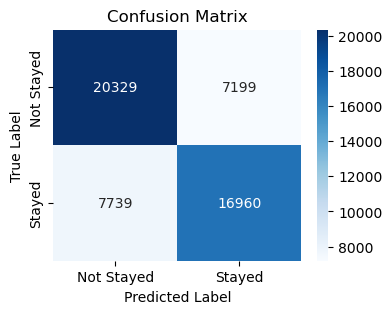

In [72]:
# Create confusion matrix
conf_matrix = metrics.confusion_matrix(results_df['Actual Stayed Flag'], results_df['Predicted'])

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
             xticklabels=['Not Stayed', 'Stayed'],
             yticklabels=['Not Stayed', 'Stayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [73]:
# Create variables for true positive, true negative, false positive and false negative
TN, FP, FN, TP = conf_matrix.ravel()  

print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

True Positive (TP): 16960
True Negative (TN): 20329
False Positive (FP): 7199
False Negative (FN): 7739


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [74]:
# Calculate sensitivity
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
sensitivity

0.6866674764160492

In [75]:
# Calculate specificity
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
specificity

0.7384844521941296

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [76]:
# Calculate precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
precision

0.7020158119127448

In [77]:
# Calculate recall
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
recall

0.6866674764160492

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [78]:
# Define ROC function
from sklearn.metrics import roc_curve, auc  

def plot_roc_curve(y_true, y_scores):   
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)  
    roc_auc = auc(fpr, tpr)  

    plt.figure(figsize = (6, 5))  
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')  
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line  
    plt.xlabel('False Positive Rate')  
    plt.ylabel('True Positive Rate (Sensitivity)')  
    plt.title('Receiver Operating Characteristic (ROC) Curve')  
    plt.legend(loc='lower right')  
    plt.grid()  
    plt.show()  

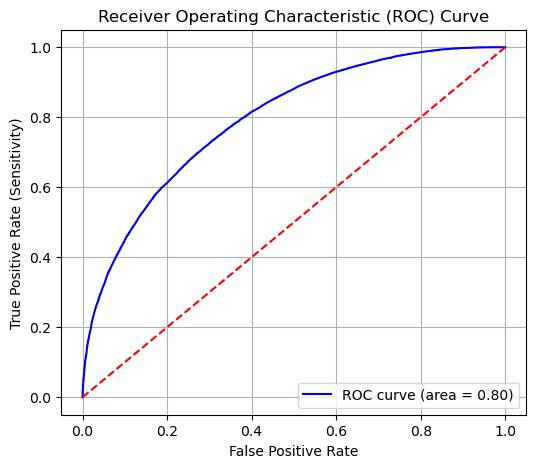

In [79]:
# Call the ROC function
plot_roc_curve(results_df['Actual Stayed Flag'], results_df['Predicted Probability'])  

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [80]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
thresholds = np.arange(0, 1.1, 0.1)  

def evaluate_cutoffs(df, thresholds):  
    metrics_dict = {  
        'Threshold': [],  
        'Accuracy': [],  
        'Precision': [],  
        'Recall': [],  
        'Specificity': []  
    }  
    
    for threshold in thresholds:  
        df['Predicted'] = (df['Predicted Probability'] >= threshold).astype(int)  
        metrics_dict['Threshold'].append(threshold)  
        metrics_dict['Accuracy'].append(accuracy)  
        metrics_dict['Precision'].append(precision)  
        metrics_dict['Recall'].append(recall)  
        metrics_dict['Specificity'].append(specificity)  

    return pd.DataFrame(metrics_dict)  

performance_df = evaluate_cutoffs(results_df, thresholds)  
performance_df

,Threshold,Accuracy,Precision,Recall,Specificity
0,0.0,0.713979,0.702016,0.686667,0.738484
1,0.1,0.713979,0.702016,0.686667,0.738484
2,0.2,0.713979,0.702016,0.686667,0.738484
3,0.3,0.713979,0.702016,0.686667,0.738484
4,0.4,0.713979,0.702016,0.686667,0.738484
5,0.5,0.713979,0.702016,0.686667,0.738484
6,0.6,0.713979,0.702016,0.686667,0.738484
7,0.7,0.713979,0.702016,0.686667,0.738484
8,0.8,0.713979,0.702016,0.686667,0.738484
9,0.9,0.713979,0.702016,0.686667,0.738484


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [81]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
def evaluate_cutoffs(df, thresholds):  
    metrics_dict = {  
        'Threshold': [],  
        'Accuracy': [],  
        'Sensitivity': [],  
        'Specificity': []  
    }  
    
    for threshold in thresholds:  
        df['Predicted'] = (df['Predicted Probability'] >= threshold).astype(int)  
        metrics_dict['Threshold'].append(threshold)  
        metrics_dict['Accuracy'].append(accuracy)  
        metrics_dict['Sensitivity'].append(sensitivity)  
        metrics_dict['Specificity'].append(specificity)  

    return pd.DataFrame(metrics_dict)  

performance_df = evaluate_cutoffs(results_df, thresholds)  
performance_df

,Threshold,Accuracy,Sensitivity,Specificity
0,0.0,0.713979,0.686667,0.738484
1,0.1,0.713979,0.686667,0.738484
2,0.2,0.713979,0.686667,0.738484
3,0.3,0.713979,0.686667,0.738484
4,0.4,0.713979,0.686667,0.738484
5,0.5,0.713979,0.686667,0.738484
6,0.6,0.713979,0.686667,0.738484
7,0.7,0.713979,0.686667,0.738484
8,0.8,0.713979,0.686667,0.738484
9,0.9,0.713979,0.686667,0.738484


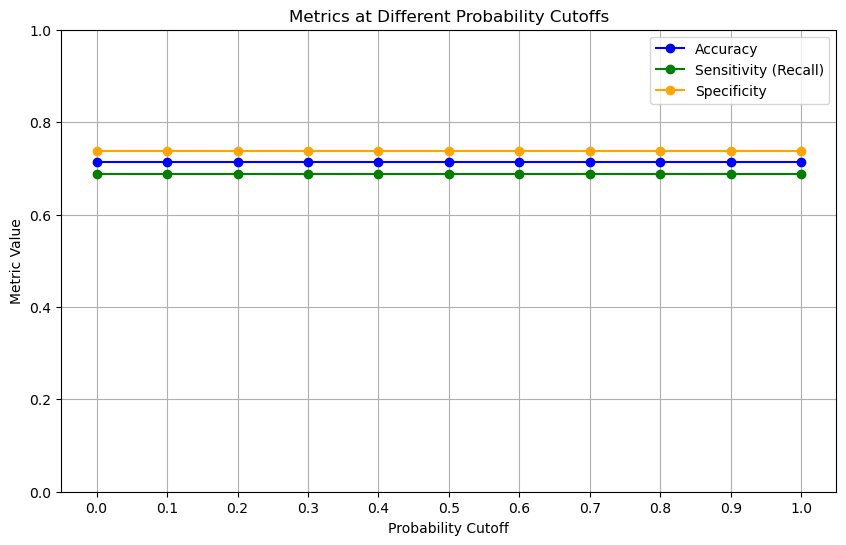

In [82]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
plt.figure(figsize=(10, 6))  

plt.plot(performance_df['Threshold'], performance_df['Accuracy'], marker='o', label='Accuracy', color='blue')  
plt.plot(performance_df['Threshold'], performance_df['Sensitivity'], marker='o', label='Sensitivity (Recall)', color='green')  
plt.plot(performance_df['Threshold'], performance_df['Specificity'], marker='o', label='Specificity', color='orange')  

plt.title('Metrics at Different Probability Cutoffs')  
plt.xlabel('Probability Cutoff')  
plt.ylabel('Metric Value')  
plt.xticks(np.arange(0, 1.1, 0.1))  
plt.ylim(0, 1)  
plt.legend()  
plt.grid()  
plt.show() 

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [83]:
# Create a column for final prediction based on the optimal cutoff
optimal_cutoff = 0.5  
results_df['Final Prediction'] = (results_df['Predicted Probability'] >= optimal_cutoff).astype(int)  
results_df

,Actual Stayed Flag,Predicted Probability,Predicted,Final Prediction
0,1,0.646163,0,1
1,0,0.311561,0,0
2,0,0.261340,0,0
3,1,0.782674,0,1
4,0,0.201672,0,0
...,...,...,...,...
52222,0,0.635898,0,1
52223,1,0.712177,0,1
52224,1,0.169570,0,0
52225,1,0.483236,0,0


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [84]:
# Calculate the accuracy
accuracy = (results_df['Final Prediction'] == results_df['Actual Stayed Flag']).mean()  
accuracy

0.7139793593352097

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

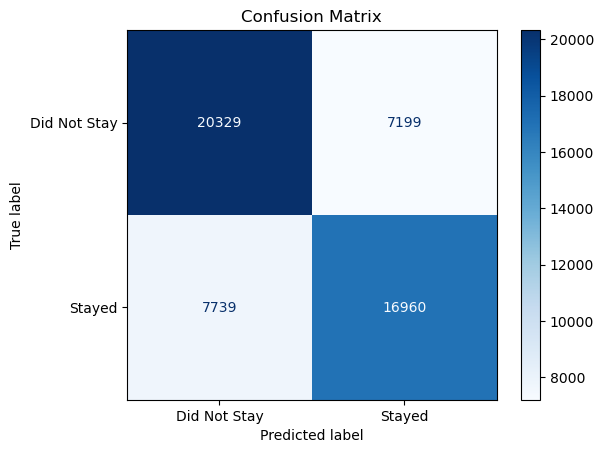

In [85]:
# Create the confusion matrix once again
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  
cm = confusion_matrix(results_df['Actual Stayed Flag'], results_df['Final Prediction'])  

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Stay', 'Stayed'])  
disp.plot(cmap='Blues', values_format='d')  
plt.title('Confusion Matrix')  
plt.show()  

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [86]:
# Create variables for true positive, true negative, false positive and false negative
TN, FP, FN, TP = cm.ravel()  

print(f'True Positives (TP): {TP}')  
print(f'True Negatives (TN): {TN}')  
print(f'False Positives (FP): {FP}')  
print(f'False Negatives (FN): {FN}')  

True Positives (TP): 16960
True Negatives (TN): 20329
False Positives (FP): 7199
False Negatives (FN): 7739


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [87]:
# Calculate Sensitivity
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0  
sensitivity

0.6866674764160492

In [88]:
# Calculate Specificity
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
specificity

0.7384844521941296

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [89]:
# Calculate Precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
precision

0.7020158119127448

In [90]:
# Calculate Recall
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
recall

0.6866674764160492

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [91]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [92]:
# Check actual and predicted values from initial model
print("Actual vs Predicted Values:")  
display(results_df[['Actual Stayed Flag', 'Predicted Probability']].head())  

precision, recall, thresholds = precision_recall_curve(results_df['Actual Stayed Flag'], results_df['Predicted Probability'])  

precision_recall_df = pd.DataFrame({'Threshold': thresholds, 'Precision': precision[:-1], 'Recall': recall[:-1]})  
print("\nPrecision and Recall at different thresholds:")  
display(precision_recall_df.head())

Actual vs Predicted Values:


,Actual Stayed Flag,Predicted Probability
0,1,0.646163
1,0,0.311561
2,0,0.261340
3,1,0.782674
4,0,0.201672



Precision and Recall at different thresholds:


,Threshold,Precision,Recall
0,0.005550,0.472916,1.0
1,0.006177,0.472925,1.0
2,0.006753,0.472934,1.0
3,0.007099,0.472943,1.0
4,0.007521,0.472953,1.0


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

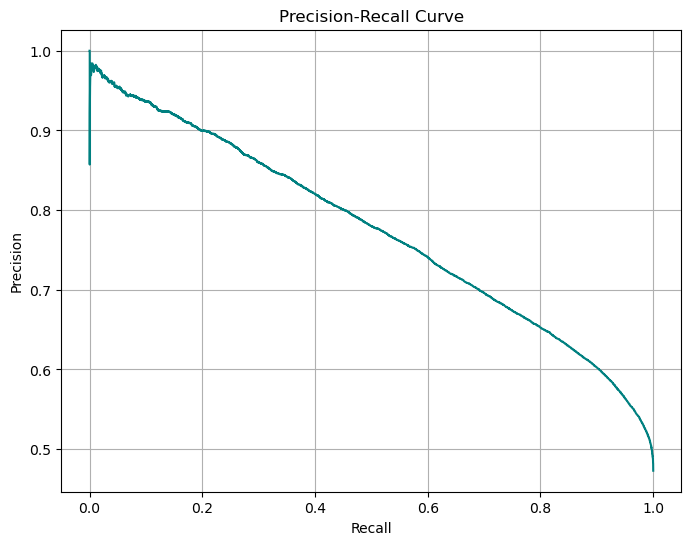

In [93]:
# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(results_df['Actual Stayed Flag'], results_df['Predicted Probability'])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='teal')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

##### 8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>


In [95]:
# Select the relevant features for validation set
X_val_selected = X_val_dummy[X_selected.columns]

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [96]:
# Add constant to X_validation
X_val_const = sm.add_constant(X_val_selected)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [97]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = result.predict(X_val_const)

# View predictions
y_validation_pred

71975    0.553377
20692    0.045310
21753    0.375180
16382    0.373750
58800    0.575072
           ...   
72737    0.485594
13004    0.912686
21670    0.354492
64600    0.198619
10012    0.017364
Length: 22383, dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [100]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred, columns=['predicted_probability'])

# Convert 'y_validation' to a DataFrame 'actual'
actual = pd.DataFrame()
actual['actual'] = y_val_dummy

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
predicted_probability.reset_index(drop=True, inplace=True)
actual.reset_index(drop=True, inplace=True)


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [101]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
results = pd.concat([actual, predicted_probability], axis=1)
results['final_prediction'] = (results['predicted_probability'] >= optimal_cutoff).astype(int)

# Check the DataFrame
results.head()


,actual,predicted_probability,final_prediction
0,1,0.553377,1
1,0,0.045310,0
2,0,0.375180,0
3,0,0.373750,0
4,0,0.575072,1


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [102]:
# Calculate the overall accuracy
accuracy = (results['final_prediction'] == results['actual']).mean()
accuracy

0.7179109145333512

### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

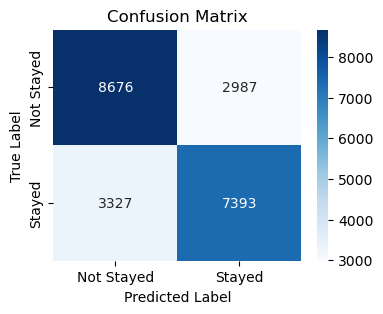

In [103]:
# Create confusion matrix
conf_matrix = metrics.confusion_matrix(results['actual'], results['final_prediction'])  

plt.figure(figsize=(4, 3))  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',   
             xticklabels=['Not Stayed', 'Stayed'],   
             yticklabels=['Not Stayed', 'Stayed'])  
plt.title('Confusion Matrix')  
plt.xlabel('Predicted Label')  
plt.ylabel('True Label')  
plt.show()  

In [104]:
# Create variables for true positive, true negative, false positive and false negative
TN, FP, FN, TP = cm.ravel()  

print(f'True Positives (TP): {TP}')  
print(f'True Negatives (TN): {TN}')  
print(f'False Positives (FP): {FP}')  
print(f'False Negatives (FN): {FN}')  

True Positives (TP): 16960
True Negatives (TN): 20329
False Positives (FP): 7199
False Negatives (FN): 7739


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [105]:
# Calculate Sensitivity
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0  
sensitivity

0.6866674764160492

In [106]:
# Calculate Specificity
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
specificity

0.7384844521941296

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [107]:
# Calculate Precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
precision

0.7020158119127448

In [108]:
# Calculate Recall
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
recall

0.6866674764160492

## Conclusion

